In [ ]:
from PIL import Image
from omegaconf import OmegaConf
from diffusion_core.utils import load_512
from diffusion_core.guiders.guidance_editing import GuidanceEditing
import gc
import torch
from diffusion_core.load_consistency import load_consistency


device = 'cuda' if torch.cuda.is_available() else 'cpu'

/home/jovyan/.mlspace/envs/inverse-and-edit/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/home/jovyan/.mlspace/envs/inverse-and-edit/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/home/jovyan/.mlspace/envs/inverse-and-edit/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


# Base Model inversion + editing

/home/jovyan/.mlspace/envs/inverse-and-edit/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/home/jovyan/.mlspace/envs/inverse-and-edit/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:182: FutureWarning: The configuration file of this scheduler: DDIMScheduler {
  "_class_name": "DDIMScheduler",
  "_diffusers_version": "0.25.1",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update the config accordingly as leaving `steps_offset` might le

Forward CD is initialized with guidance embedding, dim 512


Some weights of UNet2DConditionModel were not initialized from the model checkpoint at runwayml/stable-diffusion-v1-5 and are newly initialized: ['time_embedding.cond_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Embedded model is loading from checkpoints/sd15_cfg_distill.pt
Reverse CD is loading from checkpoints/iCD-SD15-reverse_259_519_779_999.safetensors


/home/jovyan/.mlspace/envs/inverse-and-edit/lib/python3.10/site-packages/diffusers/loaders/lora.py:1077: FutureWarning: `fuse_text_encoder_lora` is deprecated and will be removed in version 0.27. You are using an old version of LoRA backend. This will be deprecated in the next releases in favor of PEFT make sure to install the latest PEFT and transformers packages in the future.
  deprecate("fuse_text_encoder_lora", "0.27", LORA_DEPRECATION_MESSAGE)


Forward CD is loading from checkpoints/finetuned_forward_model.safetensors


/home/jovyan/.mlspace/envs/inverse-and-edit/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Endpoints reverse CTM: tensor([999, 779, 519, 259]), tensor([779, 519, 259,   0])
Endpoints forward CTM: tensor([  0, 259, 519, 779]), tensor([259, 519, 779, 999])


4it [00:00, 12.60it/s]


0it [00:00, ?it/s]

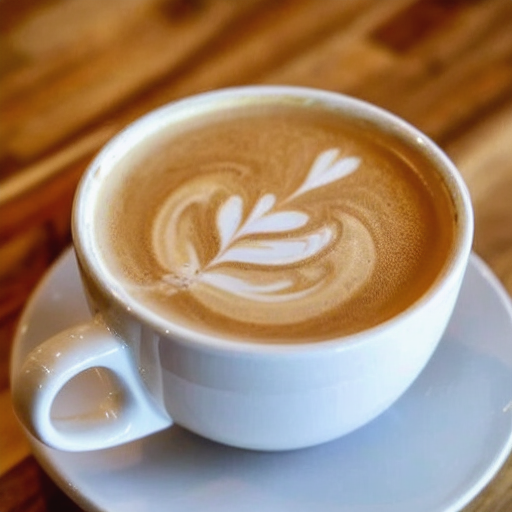

In [5]:
# model initialization without any energy functions and rescaling
solver = load_consistency(device)
    
config = OmegaConf.create()
config['cfg_schedule'] = [0, 0, 0, 0]
config['guiders'] = []
config['noise_rescaling_setup'] = {"type": 'identity_rescaler',
                                    'init_setup': None}
guidance = GuidanceEditing(solver, config, device)


image_path = './example_images/coffee.jpg'
src_prompt = 'a cup of coffee with drawing of tulip putted on the wooden table'

image = load_512(image_path)

result = guidance(image, src_prompt, 
                    src_prompt)
torch.cuda.empty_cache()
gc.collect()
Image.fromarray(result)

/home/jovyan/.mlspace/envs/inverse-and-edit/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/home/jovyan/.mlspace/envs/inverse-and-edit/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:182: FutureWarning: The configuration file of this scheduler: DDIMScheduler {
  "_class_name": "DDIMScheduler",
  "_diffusers_version": "0.25.1",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update the config accordingly as leaving `steps_offset` might le

Forward CD is initialized with guidance embedding, dim 512


Some weights of UNet2DConditionModel were not initialized from the model checkpoint at runwayml/stable-diffusion-v1-5 and are newly initialized: ['time_embedding.cond_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Embedded model is loading from checkpoints/sd15_cfg_distill.pt
Reverse CD is loading from checkpoints/iCD-SD15-reverse_259_519_779_999.safetensors


/home/jovyan/.mlspace/envs/inverse-and-edit/lib/python3.10/site-packages/diffusers/loaders/lora.py:1077: FutureWarning: `fuse_text_encoder_lora` is deprecated and will be removed in version 0.27. You are using an old version of LoRA backend. This will be deprecated in the next releases in favor of PEFT make sure to install the latest PEFT and transformers packages in the future.
  deprecate("fuse_text_encoder_lora", "0.27", LORA_DEPRECATION_MESSAGE)


Forward CD is loading from checkpoints/finetuned_forward_model.safetensors
Endpoints reverse CTM: tensor([999, 779, 519, 259]), tensor([779, 519, 259,   0])
Endpoints forward CTM: tensor([  0, 259, 519, 779]), tensor([259, 519, 779, 999])


4it [00:00, 26.02it/s]


0it [00:00, ?it/s]

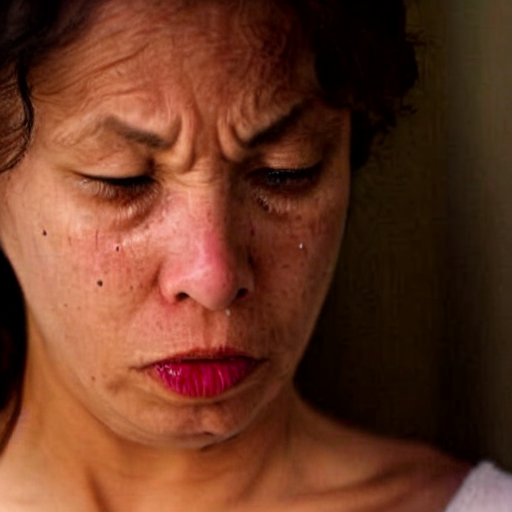

In [6]:
# model initialization without any energy functions and rescaling
solver = load_consistency(device)
    
config = OmegaConf.create()
config['cfg_schedule'] = [0, 7, 11, 19]
config['guiders'] = []
config['noise_rescaling_setup'] = {"type": 'identity_rescaler',
                                    'init_setup': None}
guidance = GuidanceEditing(solver, config, device)


image_path = './example_images/n_portman.jpg'
src_prompt = 'A photo of a woman'
trg_prompt = 'A photo of a crying woman'

image = load_512(image_path)

result = guidance(image, src_prompt, 
                    trg_prompt)
torch.cuda.empty_cache()
gc.collect()
Image.fromarray(result)

## Editing with guidance

/home/jovyan/.mlspace/envs/inverse-and-edit/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/home/jovyan/.mlspace/envs/inverse-and-edit/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:182: FutureWarning: The configuration file of this scheduler: DDIMScheduler {
  "_class_name": "DDIMScheduler",
  "_diffusers_version": "0.25.1",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update the config accordingly as leaving `steps_offset` might le

Forward CD is initialized with guidance embedding, dim 512


Some weights of UNet2DConditionModel were not initialized from the model checkpoint at runwayml/stable-diffusion-v1-5 and are newly initialized: ['time_embedding.cond_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Embedded model is loading from checkpoints/sd15_cfg_distill.pt
Reverse CD is loading from checkpoints/iCD-SD15-reverse_259_519_779_999.safetensors


/home/jovyan/.mlspace/envs/inverse-and-edit/lib/python3.10/site-packages/diffusers/loaders/lora.py:1077: FutureWarning: `fuse_text_encoder_lora` is deprecated and will be removed in version 0.27. You are using an old version of LoRA backend. This will be deprecated in the next releases in favor of PEFT make sure to install the latest PEFT and transformers packages in the future.
  deprecate("fuse_text_encoder_lora", "0.27", LORA_DEPRECATION_MESSAGE)


Forward CD is loading from checkpoints/finetuned_forward_model.safetensors
Endpoints reverse CTM: tensor([999, 779, 519, 259]), tensor([779, 519, 259,   0])
Endpoints forward CTM: tensor([  0, 259, 519, 779]), tensor([259, 519, 779, 999])


4it [00:00, 28.30it/s]


0it [00:00, ?it/s]

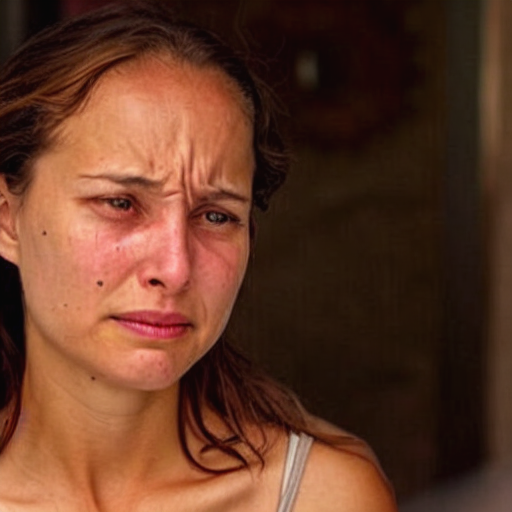

In [7]:
# model initialization with energy functions and rescaling
solver = load_consistency(device)
    
config = OmegaConf.load('configs/consistency.yaml')
guidance = GuidanceEditing(solver, config, device)


image_path = './example_images/n_portman.jpg'
src_prompt = 'A photo of a woman'
trg_prompt = 'A photo of a crying woman'

image = load_512(image_path)

result = guidance(image, src_prompt, 
                    trg_prompt)
torch.cuda.empty_cache()
gc.collect()
Image.fromarray(result)